# GAN이란?

2014 Ian Goodfellow가 GAN 논문 발표

Generative Adversarial Networks - 적대적 생성 신경망

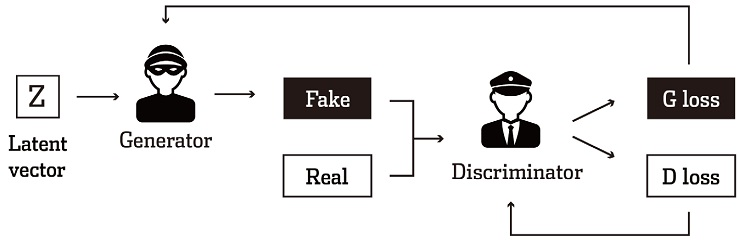

Adversarial? - 두개의 네트워크를 적대적으로 학습시킨다.(라이벌 , 경쟁심)

Generative? - GAN의 목표는 생성하는 것! 적대적으로 학습한 두개의 모델중 생성모델이 목표!

GAN은 비지도학습방식이다! - 왜? => 생성자가 데이터의 분포를 학습하면 되니까

# GAN의 확률적 접근

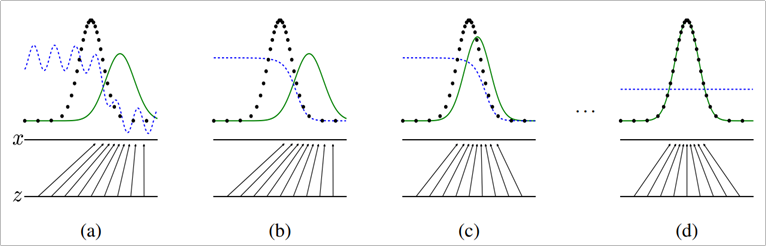

검은 점선 : 학습 데이터의 확률 분포 / 녹색 점선 : 생성자가 만들어 내는 확률 분포 / 파란 점선 : 판별자의 확률분포

a -> b -> c -> d 의 순서로 학습이 진행된다.

생성자는 점점 데이터의 분포와 동일해진다. / 판별자는 결국 0.5의 확률로 판별하게 됨(이진 분류이므로)

# GAN의 목적함수(손실함수) Loss function

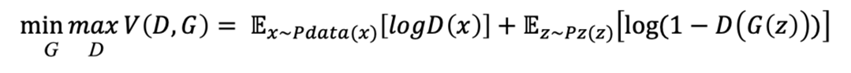

생성자 G는 Loss를 최소화해야하고 / 판별자 D는 Loss를 최대화 해야함

x의 의미 : 실제 데이터 / z의 의미 노이즈(생성자의 입력)

즉 , 생성자의 입장 : x는 사용안하므로 뒷부분만 집중! , D(G(z))가 0이 되어야 하므로 생성자의 입장에선 Loss가 최대가 되어야 좋음.

판별자 입장 : 실제 데이터는 잘 분류 해야함 -> 앞 부분 최소화 + 생성자 잘 분류 해야함 -> 뒷 부분 최소화 (D(G(z))가 1이 되어야하므로)

단, 판별자 학습시에는 앞 부분과 뒷 부분이 번갈아 등장함

In [1]:
# GAN은 두개의 모델 학습

##########생성자############################
# Generator_Loss = BCELoss(판별자(생성된 이미지) , 실제 이미지 레이블) # 실제 레이블은 True of False


#########판별자############################
# Discriminator_Loss = BCELoss(판별자(실제 이미지) , 실제 이미지 레이블) + BCELoss(판별자(생성 이미지) , 가짜 이미지 레이블)

GAN 모델 발전 순서 및 분류

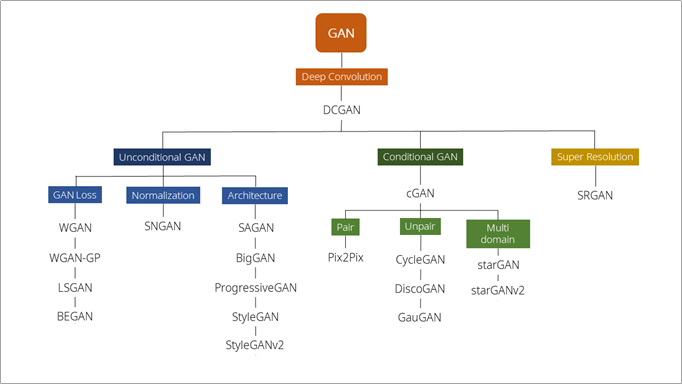

기존의 GAN에서 Convolution을 사용하는 DCGAN으로 발전

기존 GAN은 Linear Layer가 커지는 구조 -> 왜 Linear?? 이당시 CNN이 빛을 보지 못했음.

DCGAN은 CNN을 활용하여 성능 개선. -> 이후로 GAN발전

이후 Conditional 같은 경우 주어진 조건을 노이즈에 추가하여(Positional Encoding과 같이) 원하는 이미지 생성 / 판별자에도 넣어줘야 함(이를 True of False 판별 원리는 같음)

# Batch 정규화 vs Layer 정규화

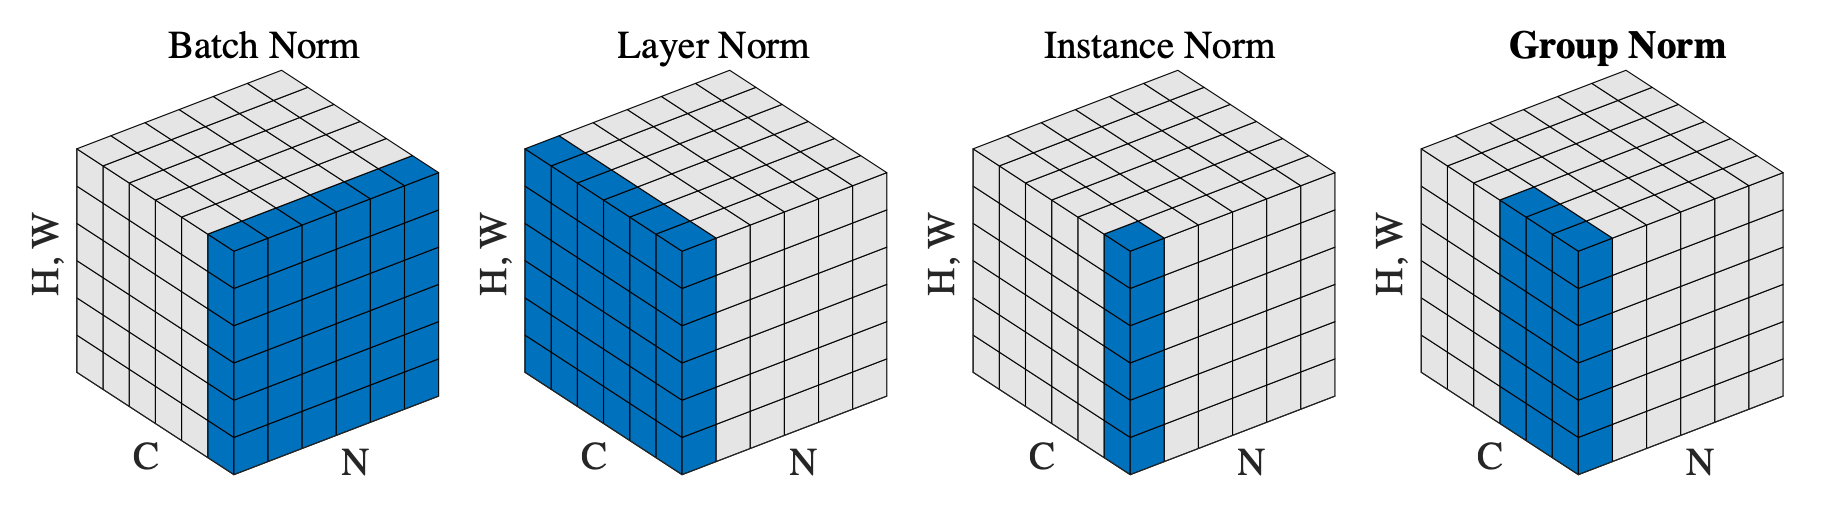

C는 채널 , N은 배치 개수

배치정규화 : 한개의 채널에 대해서 미니배치의 분포에 맞춰 정규화 진행 / 1개의 채널 , 모든 샘플

레이어 정규화 : 모든 채널에 대해서 한개의 데이터에 맞춰 정규화 진행 / 모든 채널 , 1개의 샘플